# Importing Dependencies

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 97% 64.0M/66.0M [00:00<00:00, 240MB/s]
100% 66.0M/66.0M [00:00<00:00, 221MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


# Exploratory data analysis

In [ ]:
# Loading the data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Checking the shape
df.shape

(284807, 31)

In [ ]:
# checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking distribution of numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking the class distribution of the target variable
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

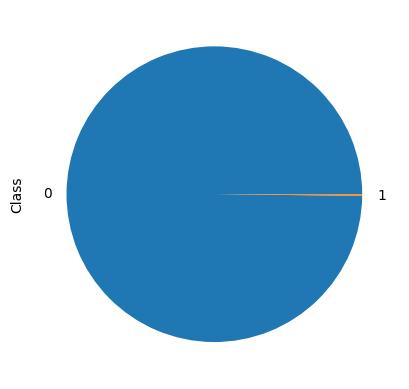

In [ ]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

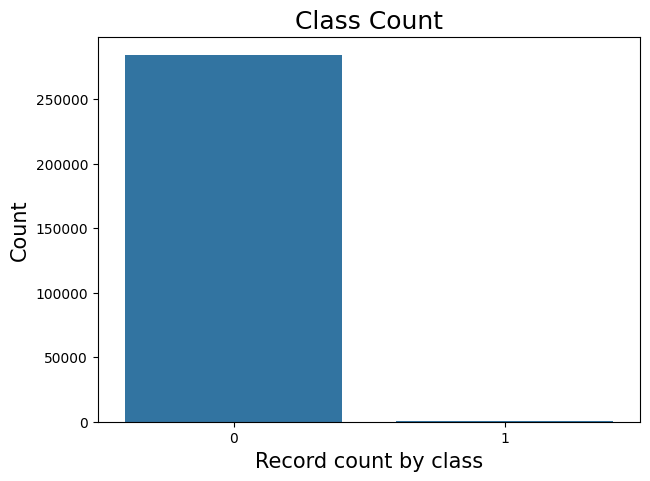

In [ ]:
# create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df, x='Class')
plt.title('Class Count', fontsize=18)
plt.xlabel('Record count by class', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()


In [ ]:
# checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

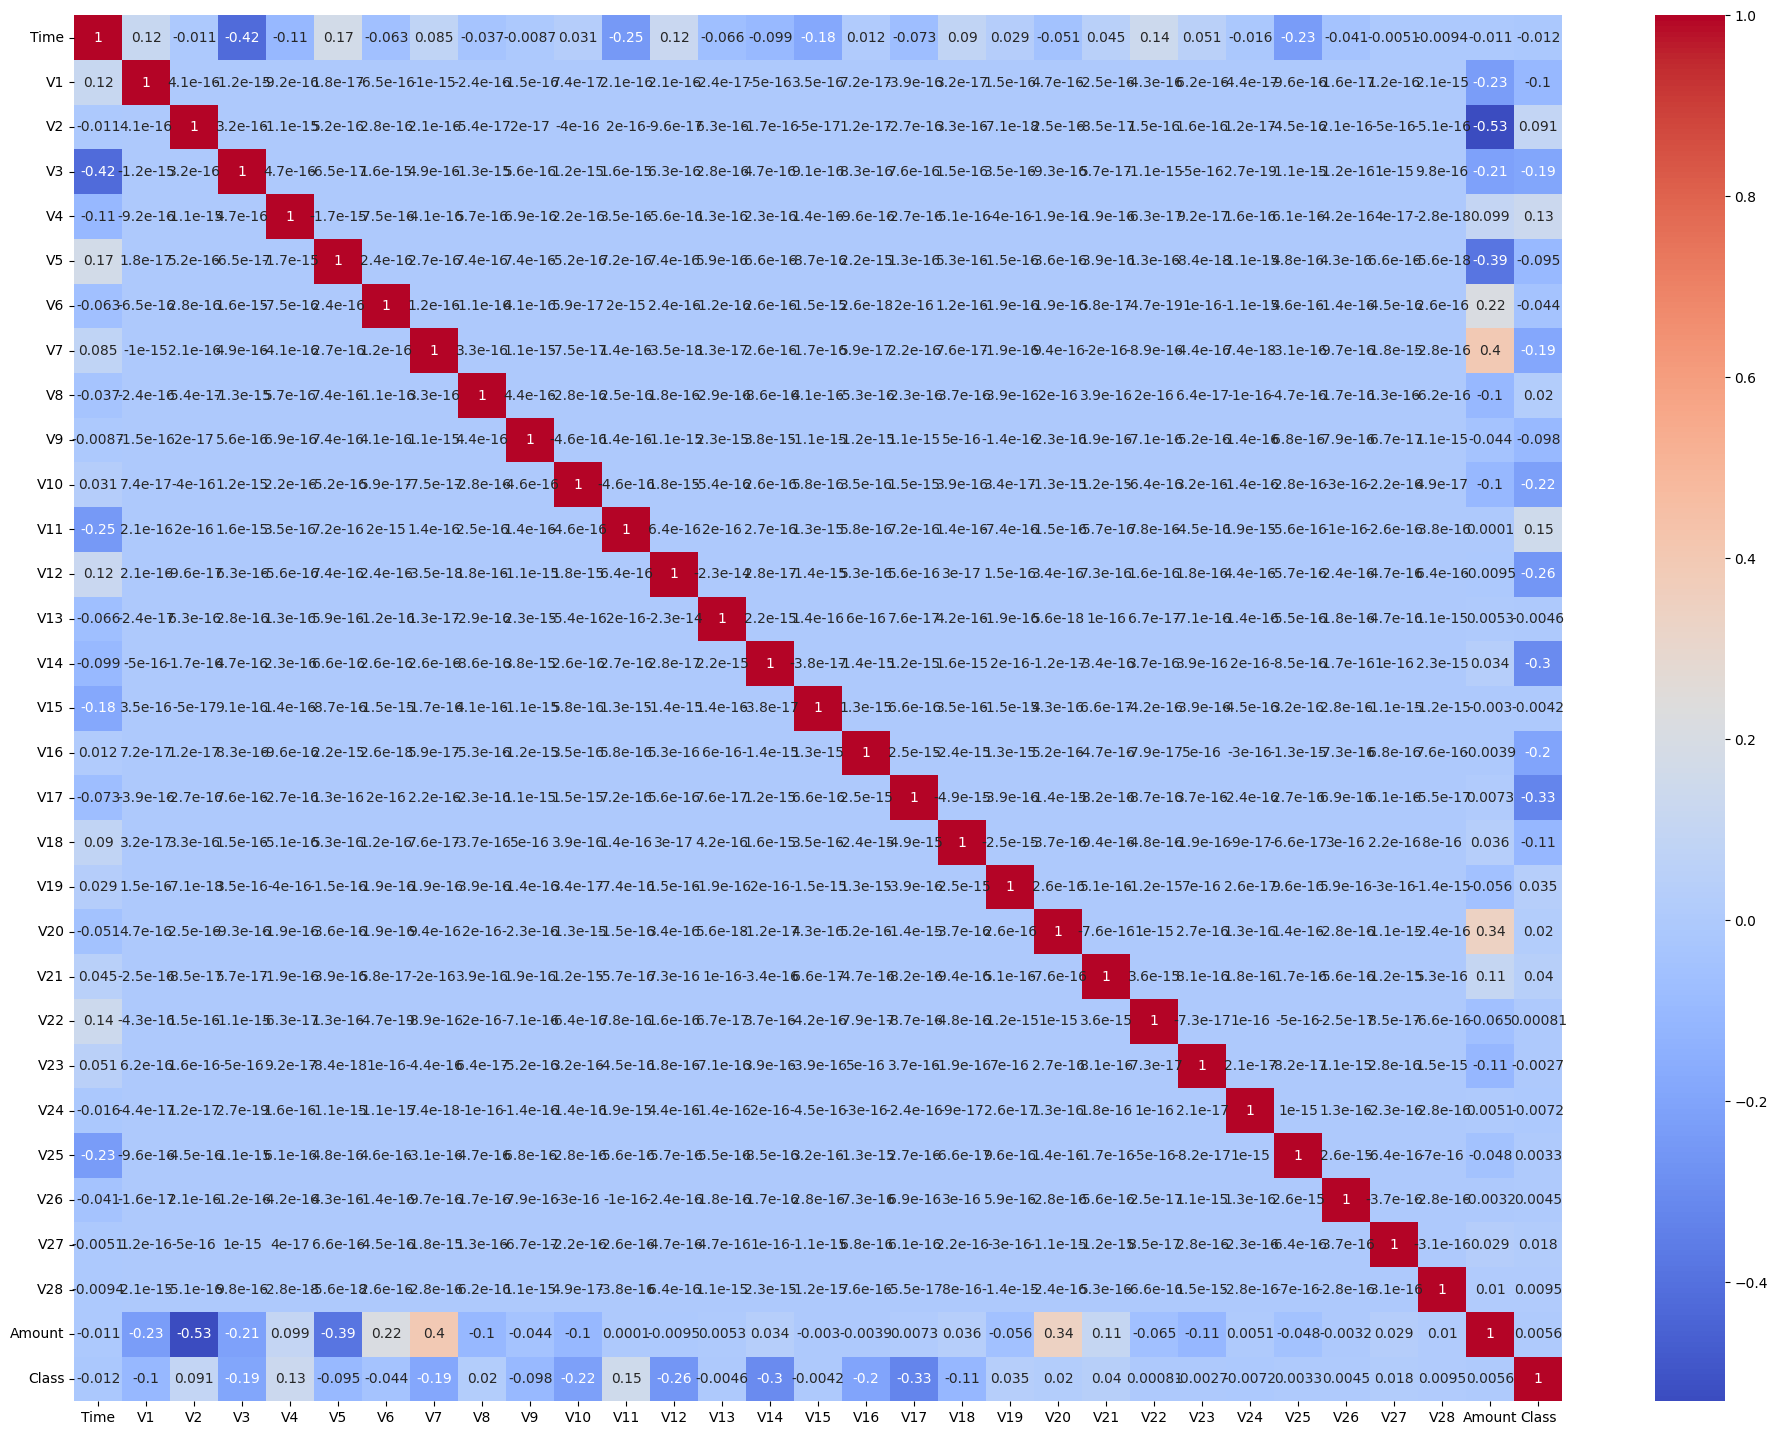

In [ ]:
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True)

Feature engineering

In [ ]:
# As time is given in relative fashion, we are using pandas.Timedelta which represents a duration, the difference between two time or dates
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and Hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [ ]:
# Drop unecessary columns
# we will drop Time as we derived the Day/Hour/Minutes from the time column
df.drop('Time', axis=1, inplace=True)
# we will keep only derived column hour, as day/minutes might not be useful
df.drop(['Time_Day','Time_Min'],axis=1, inplace=True)

Splitting the data into train & test data

In [ ]:
# Plitting the dataset into X and y
y = df['Class']
X = df.drop(['Class'],axis=1)

In [ ]:
# checking some rows of X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# checking some rows of y
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
# splitting dataset into train test split
X_train, X_test ,y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [ ]:
# checking the spread of data after split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


# Model Building

In [ ]:
# create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [ ]:
# created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test,pred_test):
  cm = confusion_matrix(y_test,pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudelent','Fraudelent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted Label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'],['FN','TP']]

  for i in range(2):
    for j in range(2):
      plt.text(j,i,str(s[i][j]) +" = " + str(cm[i][j]), fontsize=12)
  plt.show()

In [ ]:
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn import linear_model
    from sklearn.model_selection import KFold
    from sklearn import metrics
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    # L2 Regularization
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )

    # L1 Regularization
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    # Fit models
    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)

    # Extracting best cross-validation score for L1 and L2 models
    print("Max AUC ROC for L1: ", searchCV_l1.scores_[1].mean(axis=0).max())
    print("Max AUC ROC for L2: ", searchCV_l2.scores_[1].mean(axis=0).max())

    # Get the coefficients and intercepts
    print("Parameters for L1 regularisation:")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)

    print("Parameters for L2 regularisation:")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)

    # Predictions
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)

    # Predicted probabilities
    y_pred_prob_l1 = searchCV_l1.predict_proba(X_test)[:, 1]
    y_pred_prob_l2 = searchCV_l2.predict_proba(X_test)[:, 1]

    # Accuracy
    Accuracy_l1 = metrics.accuracy_score(y_test, y_pred_l1)
    Accuracy_l2 = metrics.accuracy_score(y_test, y_pred_l2)

    print("Accuracy of Logistic model with L1 regularisation: {0}".format(Accuracy_l1))
    print("Accuracy of Logistic model with L2 regularisation: {0}".format(Accuracy_l2))

    # ROC and AUC for L1 model
    l1_roc_value = metrics.roc_auc_score(y_test, y_pred_prob_l1)
    print("L1 ROC AUC Value: {0}".format(l1_roc_value))

    fpr_l1, tpr_l1, thresholds_l1 = metrics.roc_curve(y_test, y_pred_prob_l1)
    l1_threshold = thresholds_l1[np.argmax(tpr_l1 - fpr_l1)]
    print("L1 Threshold: {0}".format(l1_threshold))

    roc_auc_l1 = metrics.auc(fpr_l1, tpr_l1)
    print("ROC AUC for L1 regularisation: {:.1%}".format(roc_auc_l1))
    plt.plot(fpr_l1, tpr_l1, label="L1, AUC=" + str(roc_auc_l1))

    # ROC and AUC for L2 model
    l2_roc_value = metrics.roc_auc_score(y_test, y_pred_prob_l2)
    print("L2 ROC AUC Value: {0}".format(l2_roc_value))

    fpr_l2, tpr_l2, thresholds_l2 = metrics.roc_curve(y_test, y_pred_prob_l2)
    l2_threshold = thresholds_l2[np.argmax(tpr_l2 - fpr_l2)]
    print("L2 Threshold: {0}".format(l2_threshold))

    roc_auc_l2 = metrics.auc(fpr_l2, tpr_l2)
    print("ROC AUC for L2 regularisation: {:.1%}".format(roc_auc_l2))
    plt.plot(fpr_l2, tpr_l2, label="L2, AUC=" + str(roc_auc_l2))

    plt.legend(loc=4)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()

    new_row_l1 = pd.DataFrame({
    'Methodology': [Methodology],
    'Model': ['Logistic Regression with L1 Regularisation'],
    'Accuracy': [Accuracy_l1],
    'roc_value': [l1_roc_value],  # Change 'ROC AUC' to 'roc_value'
    'threshold': [l1_threshold]  # Change 'Threshold' to 'threshold'
})

    new_row_l2 = pd.DataFrame({
    'Methodology': [Methodology],
    'Model': ['Logistic Regression with L2 Regularisation'],
    'Accuracy': [Accuracy_l2],
    'roc_value': [l2_roc_value],  # Change 'ROC AUC' to 'roc_value'
    'threshold': [l2_threshold]  # Change 'Threshold' to 'threshold'
})


    # Concatenate results to the main DataFrame
    df_Results = pd.concat([df_Results, new_row_l1, new_row_l2], ignore_index=True)

    return df_Results


In [ ]:
# Created a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_train,y_train)
  print("model score")
  print(score)

  # Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_test,y_pred)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test,y_pred)
  print("Classification Report")
  print(classification_report(y_test, y_pred))

  knn_probs = knn.predict_proba(X_test)[:,1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test,knn_probs)
  print("KNN roc_value_value:{0}". format(knn_roc_value))
  fpr,tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  knn_threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}" .format(knn_threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr, label="Test, auc ="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  # Append results using pd.concat
  new_row = pd.DataFrame({
  'Methodology': [Methodology],
  'Model': ['KNN'],
  'Accuracy': [KNN_Accuracy],
  'roc_value': [knn_roc_value],
  'threshold': [knn_threshold]
      })
  df_Results = pd.concat([df_Results, new_row], ignore_index=True)

  return df_Results

In [ ]:
def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import pandas as pd

    # Evaluate Decision Tree model with 'gini' & 'entropy'
    criteria = ['gini', 'entropy']

    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)

        # Predicting
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)

        # Predicted probabilities for ROC AUC
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = metrics.roc_auc_score(y_test, tree_preds)

        # Output results
        print(f"{c} criterion score: {test_score}")
        print("Confusion Matrix:")
        Plot_confusion_matrix(y_test, y_pred)
        print("Classification Report:")
        print(metrics.classification_report(y_test, y_pred))

        print(f"{c} criterion tree ROC value: {tree_roc_value}")

        # ROC curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        tree_threshold = thresholds[np.argmax(tpr - fpr)]
        print(f"Tree threshold: {tree_threshold}")

        # Plotting ROC curve
        roc_auc = metrics.auc(fpr, tpr)
        print(f"ROC AUC for the test dataset: {roc_auc:.1%}")
        plt.plot(fpr, tpr, label=f"Test, AUC = {roc_auc}")
        plt.legend(loc=4)
        plt.show()

        # Append results using pd.concat
        new_row = pd.DataFrame({
            'Methodology': [Methodology],
            'Model': [f'Tree Model with {c} criterion'],
            'Accuracy': [test_score],
            'roc_value': [tree_roc_value],
            'threshold': [tree_threshold]
        })
        df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


In [ ]:
def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import pandas as pd

    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)

    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)

    print('Model Accuracy: {0}'.format(RF_test_score))

    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)  # Make sure this function is imported/defined
    print("Classification Report")
    print(metrics.classification_report(y_test, rf_predictions))

    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    roc_value = metrics.roc_auc_score(y_test, rf_probs)

    print("Random Forest ROC AUC Value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("Random Forest Threshold: {0}".format(threshold))

    # Plot ROC curve
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC AUC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC = " + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results using pd.concat
    new_row = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Random Forest'],
        'Accuracy': [RF_test_score],
        'roc_value': [roc_value],
        'threshold': [threshold]
    })
    df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


In [ ]:
def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from xgboost import XGBClassifier
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import pandas as pd

    # Initialize and train XGBoost model
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)

    # Model predictions
    y_pred = XGBmodel.predict(X_test)
    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    # Confusion Matrix
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)  # Ensure this function is defined or imported
    print("Classification Report")
    print(metrics.classification_report(y_test, y_pred))

    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    XGB_roc_value = metrics.roc_auc_score(y_test, XGB_probs)
    print("XGBoost ROC AUC Value: {0}".format(XGB_roc_value))

    # ROC curve and threshold
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("XGBoost Threshold: {0}".format(threshold))

    # Plot ROC curve
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC = " + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Update results DataFrame using pd.concat
    new_row = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['XGBoost'],
        'Accuracy': [XGB_test_score],
        'roc_value': [XGB_roc_value],
        'threshold': [threshold]
    })
    df_Results = pd.concat([df_Results, new_row], ignore_index=True)

    return df_Results


Perform Cross Validation with RepeatedKFold

In [ ]:
# Lets perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
  print("Train:", train_index, "TEST:",test_index)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

Train: [     0      1      2 ... 284804 284805 284806] TEST: [     5      7      9 ... 284788 284791 284800]
Train: [     0      2      3 ... 284803 284804 284805] TEST: [     1      4     11 ... 284799 284801 284806]
Train: [     1      2      3 ... 284802 284804 284806] TEST: [     0     13     26 ... 284792 284803 284805]
Train: [     0      1      4 ... 284803 284805 284806] TEST: [     2      3      6 ... 284789 284797 284804]
Train: [     0      1      2 ... 284804 284805 284806] TEST: [    10     25     28 ... 284793 284796 284802]
Train: [     0      1      2 ... 284803 284805 284806] TEST: [     4      6     23 ... 284792 284799 284804]
Train: [     0      1      2 ... 284804 284805 284806] TEST: [     3     11     17 ... 284782 284794 284797]
Train: [     0      3      4 ... 284803 284804 284806] TEST: [     1      2      8 ... 284791 284800 284805]
Train: [     0      1      2 ... 284803 284804 284805] TEST: [     5      7     16 ... 284798 284802 284806]
Train: [     1     

Logistic Regression with L1 and L2 Regularisation
Max AUC ROC for L1:  0.9753901692039871
Max AUC ROC for L2:  0.5606395332796354
Parameters for L1 regularisation:
[[-0.05685931 -0.13108694 -0.18401875  0.06730643 -0.26045654  0.09271091
   0.12001726 -0.03290121 -0.14459313 -0.1419061  -0.02855463  0.0104754
  -0.13955396 -0.22409504  0.01539293 -0.11490971 -0.22253812  0.03344139
   0.01221045  0.2277782   0.08623133 -0.02768478 -0.01779906 -0.01265638
  -0.03536336  0.00505241 -0.047837    0.01099281 -0.00650674 -0.11652894]]
[-2.09912445]
Parameters for L2 regularisation:
[[-1.28828800e-07  1.01259383e-07 -1.89900064e-07  1.18736667e-07
  -1.01475083e-07 -4.24513255e-08 -1.42813454e-07  2.78322152e-08
  -7.60151047e-08 -1.40300640e-07  1.11247856e-07 -1.51433883e-07
  -3.69315686e-09 -1.75225022e-07  2.89732218e-09 -1.11031199e-07
  -1.76752584e-07 -5.18830422e-08  1.72903947e-08  9.47127901e-09
   1.39191623e-08 -9.18737815e-10 -1.58659855e-10 -1.25500907e-09
  -4.95844885e-09  2.

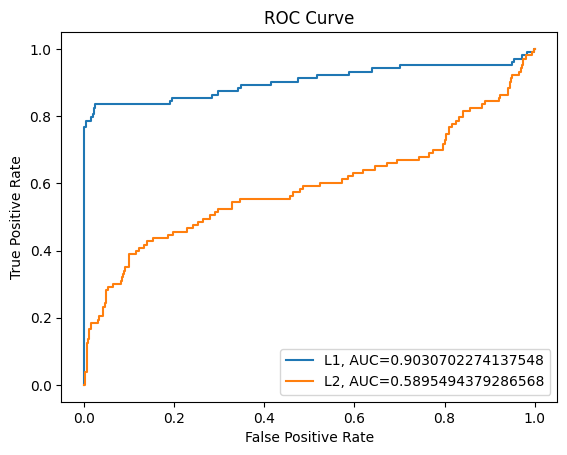

Time Taken by Model: -----97.10936427116394econds-----
------------------------------------------------------------
KNN Model
model score
0.9993372716659498
Confusion Matrix


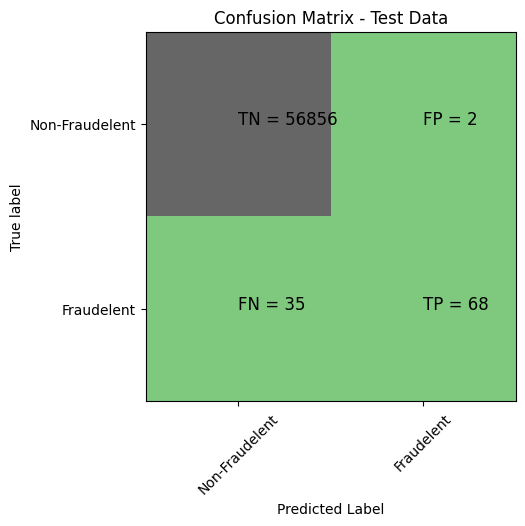

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.97      0.66      0.79       103

    accuracy                           1.00     56961
   macro avg       0.99      0.83      0.89     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value_value:0.8784560207391127
KNN threshold: 0.2
ROC for the test dataset 87.8%


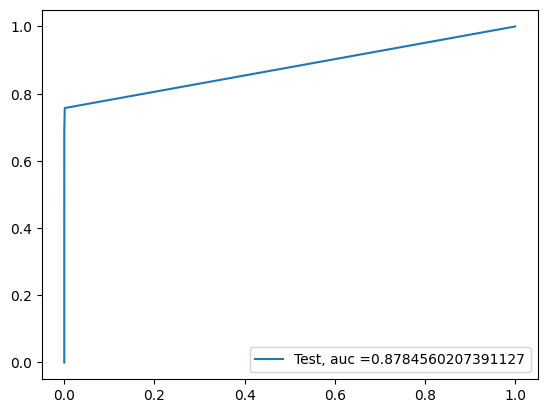

Time Taken by Model: -----23.4572594165802econds-----
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini criterion score: 0.9991924299081828
Confusion Matrix:


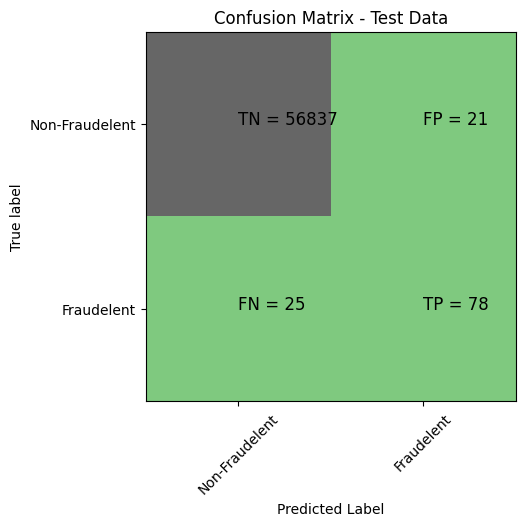

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.79      0.76      0.77       103

    accuracy                           1.00     56961
   macro avg       0.89      0.88      0.89     56961
weighted avg       1.00      1.00      1.00     56961

gini criterion tree ROC value: 0.8784561061161736
Tree threshold: 1.0
ROC AUC for the test dataset: 87.8%


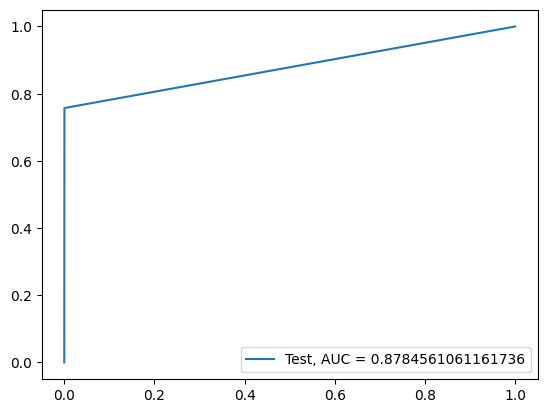

entropy criterion score: 0.9992099857797441
Confusion Matrix:


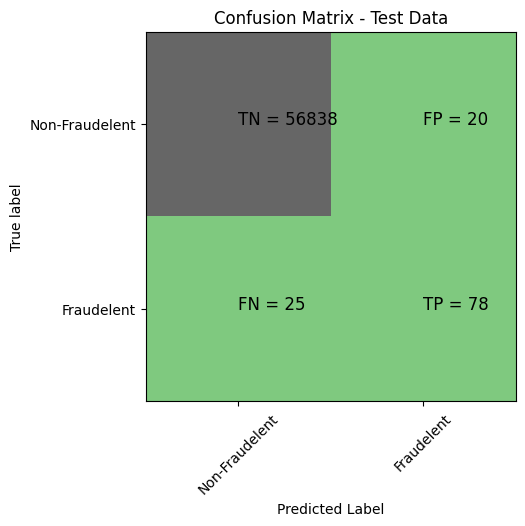

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.80      0.76      0.78       103

    accuracy                           1.00     56961
   macro avg       0.90      0.88      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropy criterion tree ROC value: 0.8784648999534524
Tree threshold: 1.0
ROC AUC for the test dataset: 87.8%


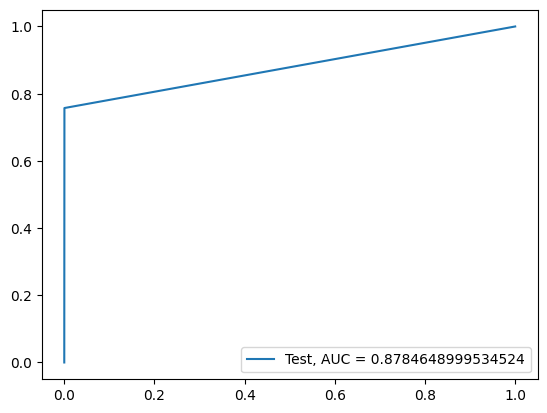

Time Taken by Model: -----32.62147378921509econds-----
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9996313266972139
Confusion Matrix


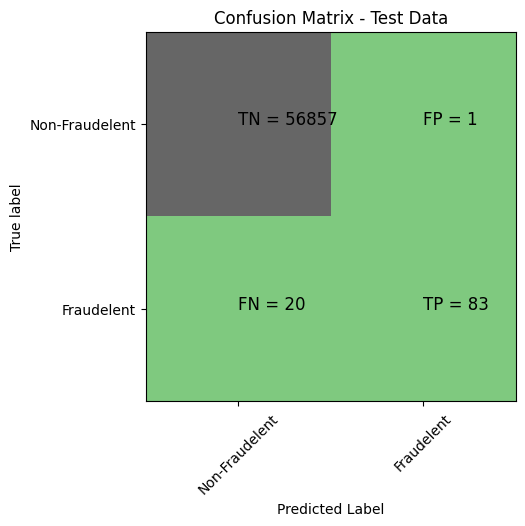

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.99      0.81      0.89       103

    accuracy                           1.00     56961
   macro avg       0.99      0.90      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC AUC Value: 0.9451821212238154
Random Forest Threshold: 0.04
ROC AUC for the test dataset: 94.5%


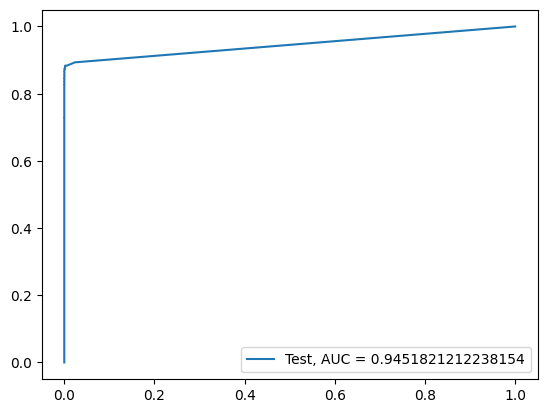

Time Taken by Model: -----213.31401467323303econds-----
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995962149540913
Confusion Matrix


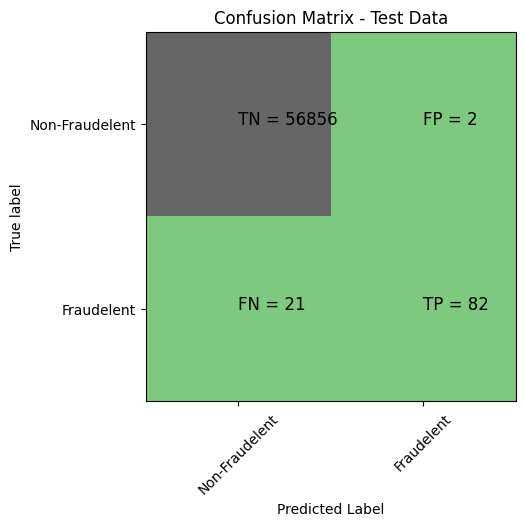

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.98      0.80      0.88       103

    accuracy                           1.00     56961
   macro avg       0.99      0.90      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost ROC AUC Value: 0.984302061309609
XGBoost Threshold: 3.54143267031759e-05
ROC for the test dataset: 98.4%


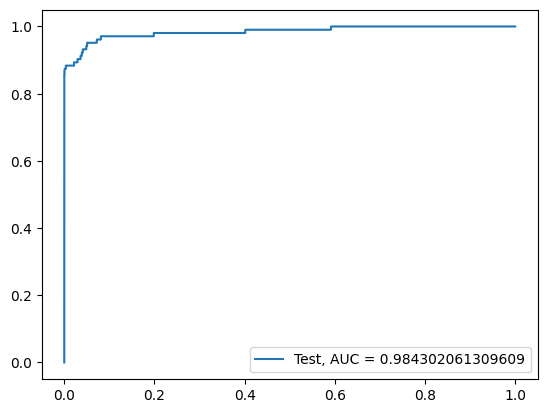

Time Taken by Model: -----1.2110493183135986econds-----
------------------------------------------------------------


In [ ]:
# Run logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv,y_test_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run KNN model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv,y_test_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv,y_test_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv,y_test_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv,y_test_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

In [ ]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998999,0.903070,0.063809
1,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998192,0.589549,0.499270
2,RepeatedKFold Cross Validation,KNN,0.999350,0.878456,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criterion,0.999192,0.878456,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criterion,0.999210,0.878465,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999631,0.945182,0.040000
6,RepeatedKFold Cross Validation,XGBoost,0.999596,0.984302,0.000035


Perform cross validation with StratifiedKFold

In [ ]:
# Lets perform StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
rkf = RepeatedKFold(n_splits=5,random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
  print("Train:", train_index, "TEST:",test_index)
  X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

Train: [     0      1      3 ... 284802 284803 284806] TEST: [     2     18     22 ... 284799 284804 284805]
Train: [     0      1      2 ... 284804 284805 284806] TEST: [     4     10     11 ... 284795 284801 284803]
Train: [     1      2      4 ... 284803 284804 284805] TEST: [     0      3      5 ... 284794 284802 284806]
Train: [     0      1      2 ... 284804 284805 284806] TEST: [     6      7      8 ... 284789 284791 284800]
Train: [     0      2      3 ... 284804 284805 284806] TEST: [     1     17     23 ... 284796 284797 284798]
Train: [     0      1      2 ... 284804 284805 284806] TEST: [     5      6     14 ... 284792 284800 284801]
Train: [     0      3      4 ... 284804 284805 284806] TEST: [     1      2     15 ... 284797 284802 284803]
Train: [     0      1      2 ... 284801 284802 284803] TEST: [     4      8      9 ... 284804 284805 284806]
Train: [     1      2      4 ... 284804 284805 284806] TEST: [     0      3      7 ... 284783 284791 284793]
Train: [     0     

Logistic Regression with L1 and L2 Regularisation
Max AUC ROC for L1:  0.974515698289208
Max AUC ROC for L2:  0.5673496148087216
Parameters for L1 regularisation:
[[-0.05578623 -0.12167071 -0.18631232  0.0675007  -0.26410087  0.09356602
   0.1141677  -0.02942362 -0.14504437 -0.14988153 -0.02923844  0.00265443
  -0.13467803 -0.23045871  0.01494024 -0.12003008 -0.23106181  0.02824782
   0.01004794  0.23472709  0.0836596  -0.02486236  0.00633739 -0.01967491
  -0.02275233  0.00779271 -0.0575518   0.01128021 -0.00649525 -0.11654634]]
[-2.09888396]
Parameters for L2 regularisation:
[[-1.08413650e-07  1.12139869e-07 -1.63418868e-07  1.16649138e-07
  -8.68620773e-08 -2.21996119e-08 -1.39846670e-07  7.66385844e-10
  -6.15924093e-08 -1.60321053e-07  1.10974807e-07 -1.64427576e-07
   4.19795103e-09 -1.89437507e-07  4.12676914e-09 -1.16793440e-07
  -1.71054060e-07 -5.46246500e-08  1.23997360e-08  8.25605154e-09
   1.53711944e-08 -2.67345070e-09 -5.23996966e-09 -1.06969285e-08
  -7.10991823e-10  5.

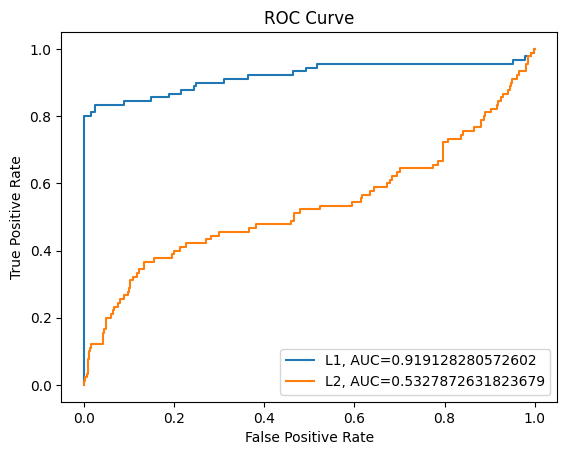

Time Taken by Model: -----95.75176310539246econds-----
------------------------------------------------------------
KNN Model
model score
0.9993328827365853
Confusion Matrix


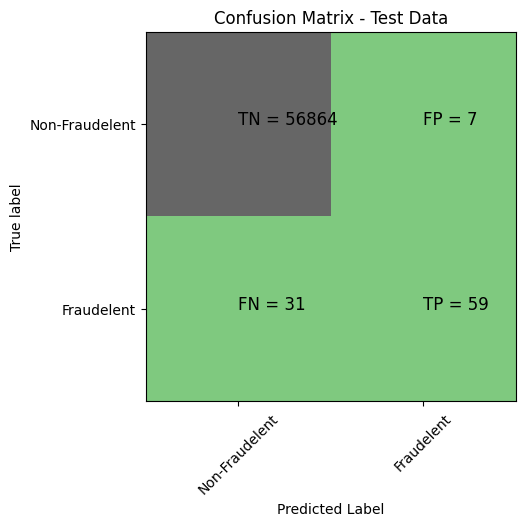

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.89      0.66      0.76        90

    accuracy                           1.00     56961
   macro avg       0.95      0.83      0.88     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value_value:0.8831011314104631
KNN threshold: 0.2
ROC for the test dataset 88.3%


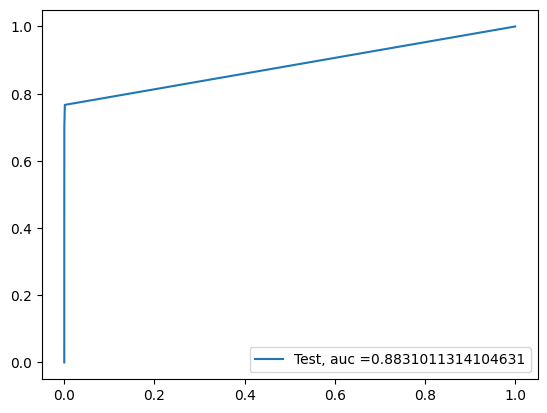

Time Taken by Model: -----23.755347728729248econds-----
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini criterion score: 0.9989993153210092
Confusion Matrix:


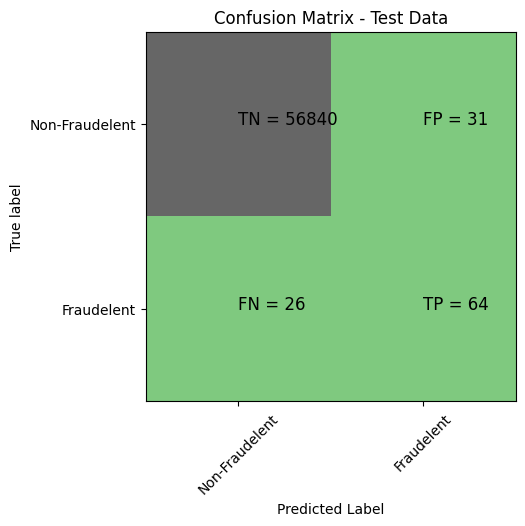

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.67      0.71      0.69        90

    accuracy                           1.00     56961
   macro avg       0.84      0.86      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini criterion tree ROC value: 0.8552830089149127
Tree threshold: 1.0
ROC AUC for the test dataset: 85.5%


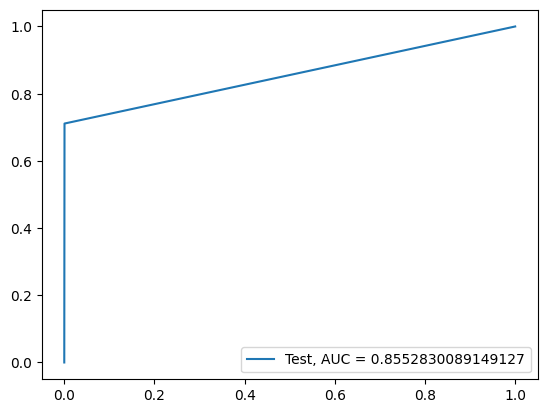

entropy criterion score: 0.9993679886237953
Confusion Matrix:


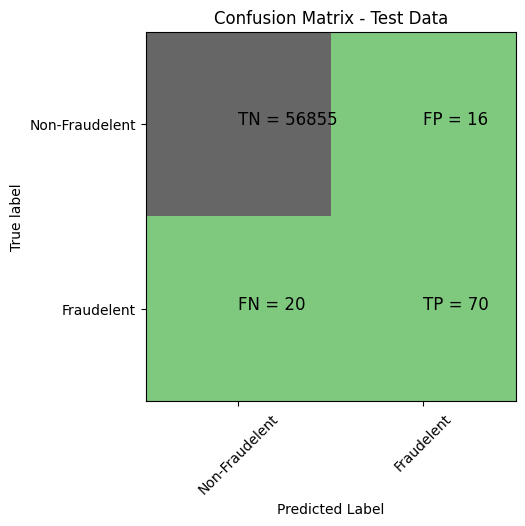

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.81      0.78      0.80        90

    accuracy                           1.00     56961
   macro avg       0.91      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

entropy criterion tree ROC value: 0.8887482196550087
Tree threshold: 1.0
ROC AUC for the test dataset: 88.9%


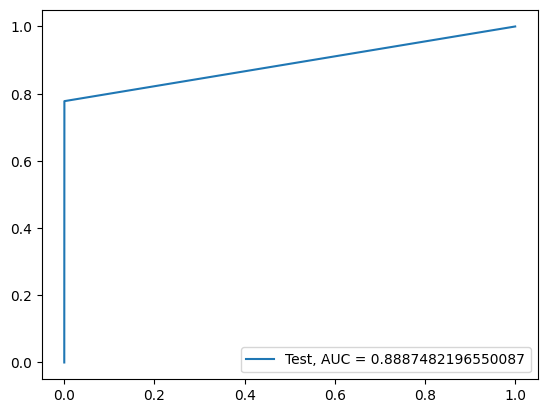

Time Taken by Model: -----33.121986865997314econds-----
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9996839943118976
Confusion Matrix


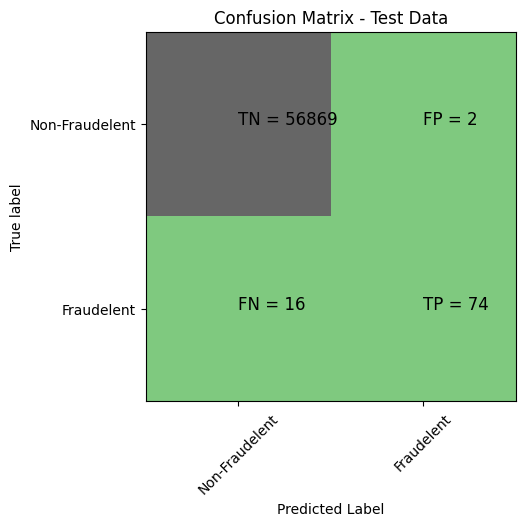

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.97      0.82      0.89        90

    accuracy                           1.00     56961
   macro avg       0.99      0.91      0.95     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC AUC Value: 0.9597572674219823
Random Forest Threshold: 0.06
ROC AUC for the test dataset: 96.0%


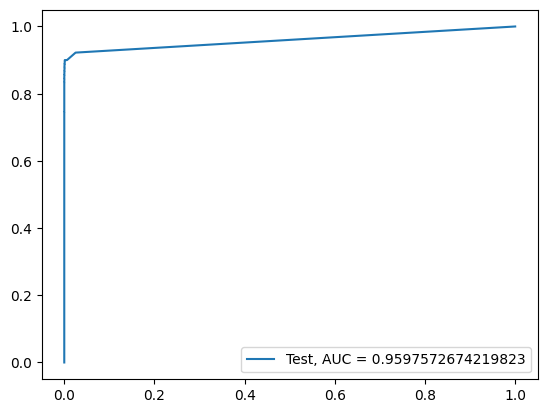

Time Taken by Model: -----212.9754877090454econds-----
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9996839943118976
Confusion Matrix


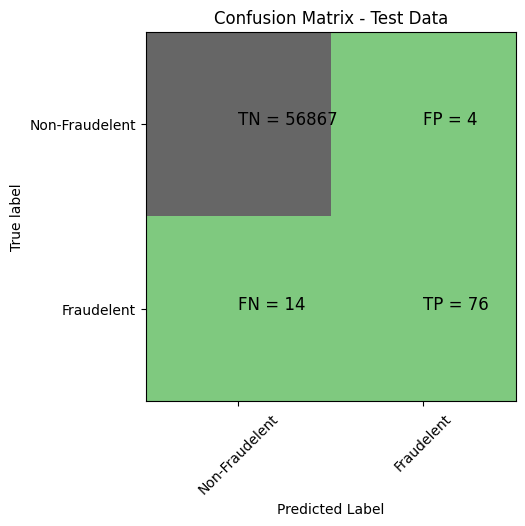

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.95      0.84      0.89        90

    accuracy                           1.00     56961
   macro avg       0.97      0.92      0.95     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost ROC AUC Value: 0.9958047354734594
XGBoost Threshold: 0.0001544138794997707
ROC for the test dataset: 99.6%


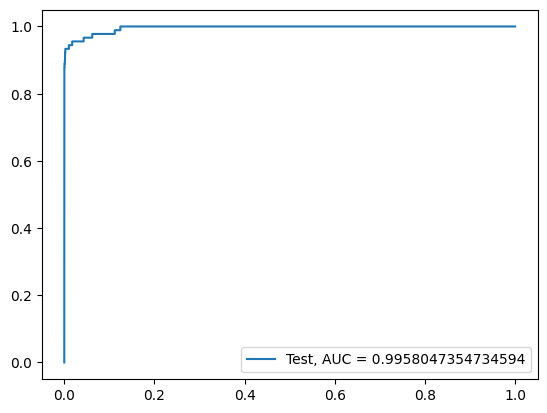

Time Taken by Model: -----1.1325337886810303econds-----
------------------------------------------------------------


In [ ]:
# Run logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run KNN model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: -----%seconds-----" % (time.time() - start_time))
print('-'*60)


In [ ]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998999,0.903070,0.063809
1,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998192,0.589549,0.499270
2,RepeatedKFold Cross Validation,KNN,0.999350,0.878456,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criterion,0.999192,0.878456,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criterion,0.999210,0.878465,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999631,0.945182,0.040000
6,RepeatedKFold Cross Validation,XGBoost,0.999596,0.984302,0.000035
7,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999122,0.919128,0.059616
8,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998420,0.532787,0.499277
9,StratifiedKFold Cross Validation,KNN,0.999333,0.883101,0.200000


In this context XGBoost with RepeatedKFold performs best with ROC-VALUE of 0.99 and optimal threshold of 0.000063

# Model building with balancing classes

Perform class balancing with:

*   Random Oversampling
*   SMOTE
*   ADASYN



# Model building with balancing classes
Perform class balancing with:


*   Random Oversampling
*   SMOTE
*   ADASYN



## Oversampling with RandomOverSampler with StratifiedKFold Cross Validation


* We will use Random Oversampling method to handle the class imbalance




In [ ]:
# Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
cols = X.columns

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over = ROS.fit_resample(X_train, y_train)

X_over = pd.DataFrame(data=X_over, columns=cols)

Logistic Regression with L1 and L2 Regularisation
Max AUC ROC for L1:  0.5
Max AUC ROC for L2:  0.5
Parameters for L1 regularisation:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
Parameters for L2 regularisation:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
Accuracy of Logistic model with L1 regularisation: 0.9982795245869981
Accuracy of Logistic model with L2 regularisation: 0.9982795245869981
L1 ROC AUC Value: 0.5
L1 Threshold: inf
ROC AUC for L1 regularisation: 50.0%
L2 ROC AUC Value: 0.5
L2 Threshold: inf
ROC AUC for L2 regularisation: 50.0%


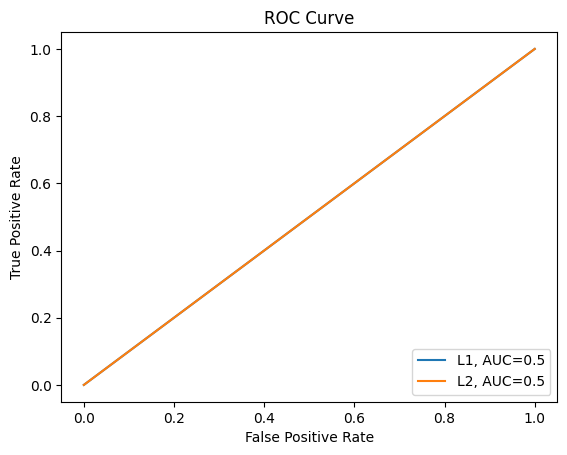

Time Taken by Model: ---- 98.16127419471741 seconds ----
------------------------------------------------------------
KNN Model
model score
0.9997537942071294
Confusion Matrix


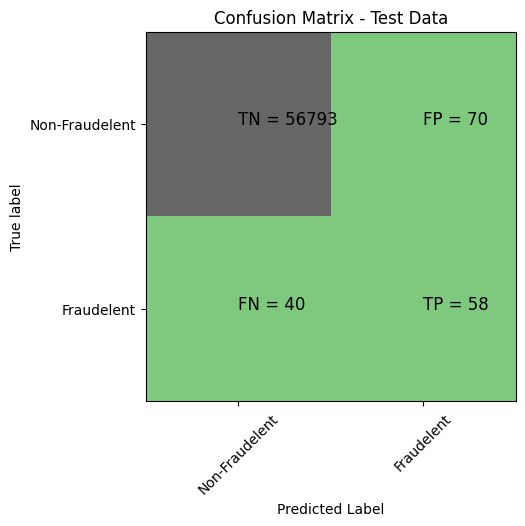

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value_value:0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


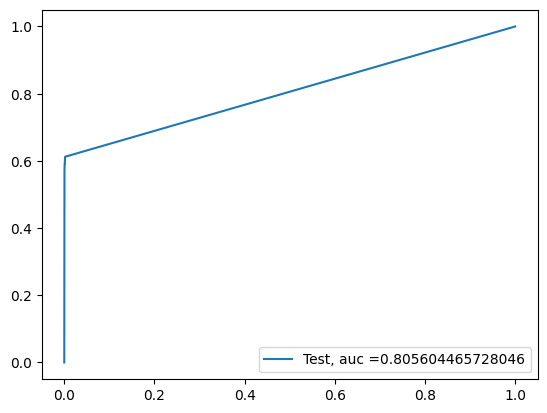

Time Taken by Model: ---- 38.12266230583191 seconds ----
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini criterion score: 0.9990870946788153
Confusion Matrix:


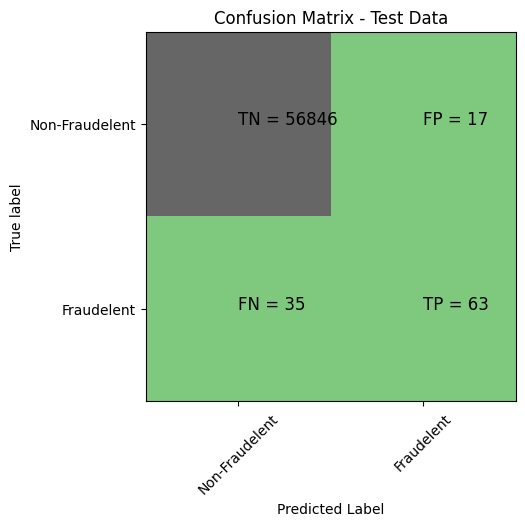

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.64      0.71        98

    accuracy                           1.00     56961
   macro avg       0.89      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini criterion tree ROC value: 0.8212790893400429
Tree threshold: 1.0
ROC AUC for the test dataset: 82.1%


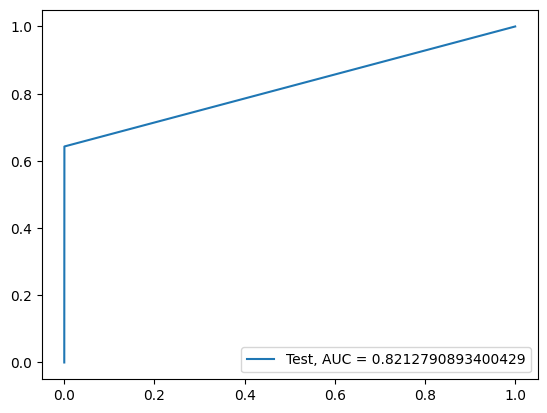

entropy criterion score: 0.9990519829356929
Confusion Matrix:


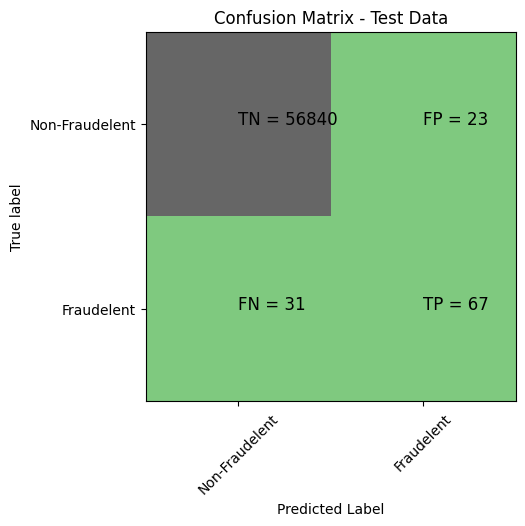

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.74      0.68      0.71        98

    accuracy                           1.00     56961
   macro avg       0.87      0.84      0.86     56961
weighted avg       1.00      1.00      1.00     56961

entropy criterion tree ROC value: 0.8416344942211624
Tree threshold: 1.0
ROC AUC for the test dataset: 84.2%


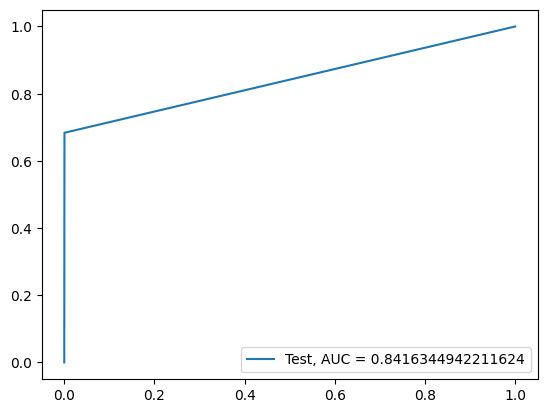

Time Taken by Model: -----20.303917407989502 seconds-----
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


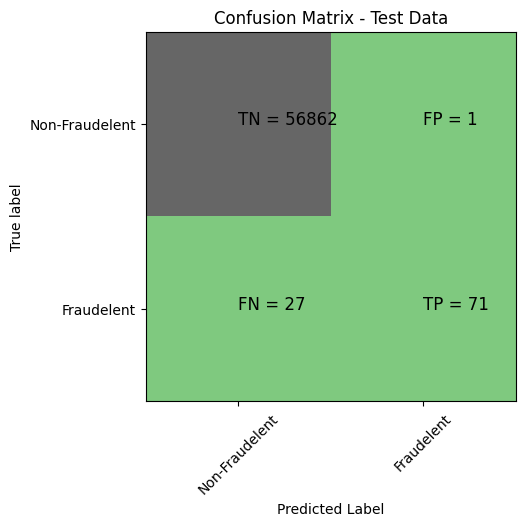

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC AUC Value: 0.9461502888970161
Random Forest Threshold: 0.02
ROC AUC for the test dataset: 94.6%


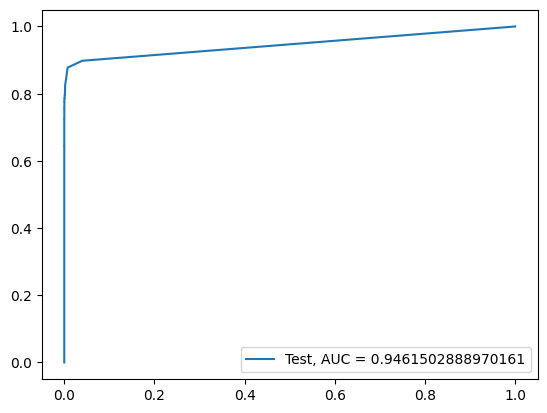

Time Taken by Model: -----151.90553402900696 seconds-----
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999490879724724
Confusion Matrix


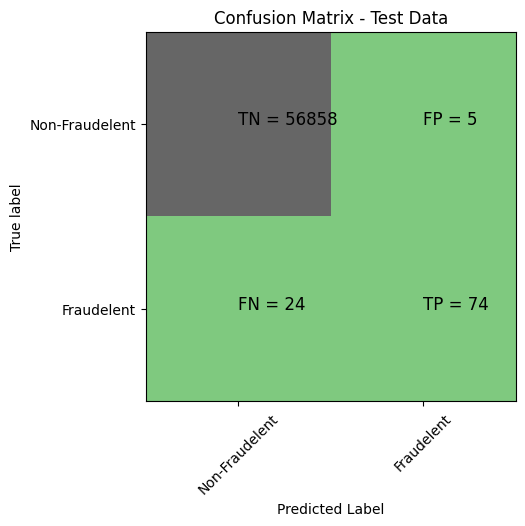

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost ROC AUC Value: 0.9744177466283983
XGBoost Threshold: 8.481678378302604e-05
ROC for the test dataset: 97.4%


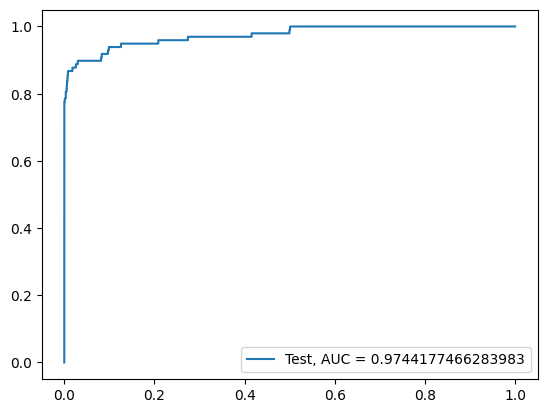

Time Taken by Model: -----5.187906742095947 seconds-----
------------------------------------------------------------


In [ ]:
# Running Logistic Regression with L1 and L2 Regularisation
Data_Imbalance_Handling = "Random OverSampling with StratifiedKFold CV"
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)



KNN Model
model score
0.9997537942071294
Confusion Matrix


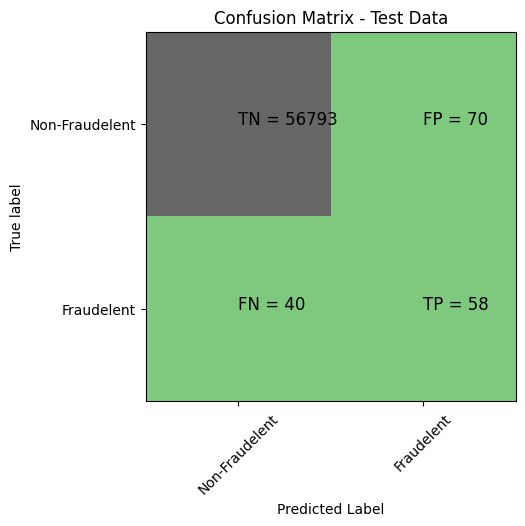

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value_value:0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


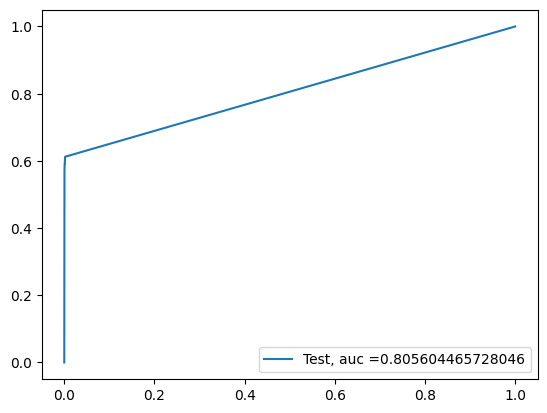

Time Taken by Model: -----38.3149139881134 seconds-----
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini criterion score: 0.9986481978897842
Confusion Matrix:


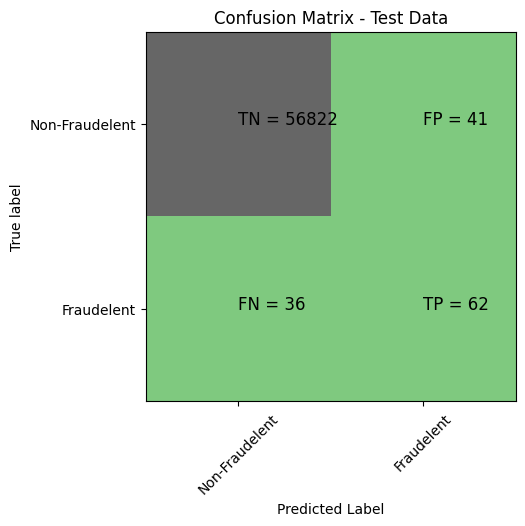

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.60      0.63      0.62        98

    accuracy                           1.00     56961
   macro avg       0.80      0.82      0.81     56961
weighted avg       1.00      1.00      1.00     56961

gini criterion tree ROC value: 0.8159660149869702
Tree threshold: 1.0
ROC AUC for the test dataset: 81.6%


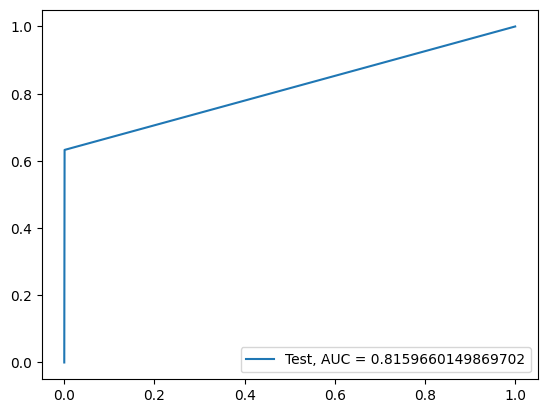

entropy criterion score: 0.9991397622934991
Confusion Matrix:


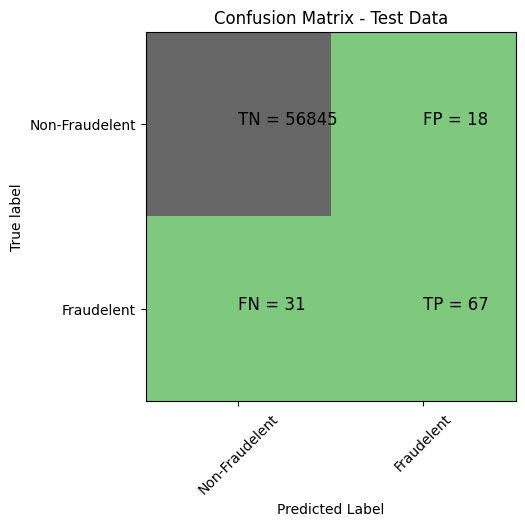

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.68      0.73        98

    accuracy                           1.00     56961
   macro avg       0.89      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy criterion tree ROC value: 0.8416784595413179
Tree threshold: 1.0
ROC AUC for the test dataset: 84.2%


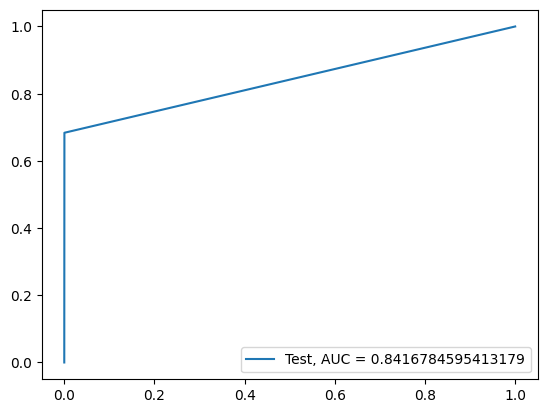

Time Taken by Model: -----20.6634624004364 seconds-----
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


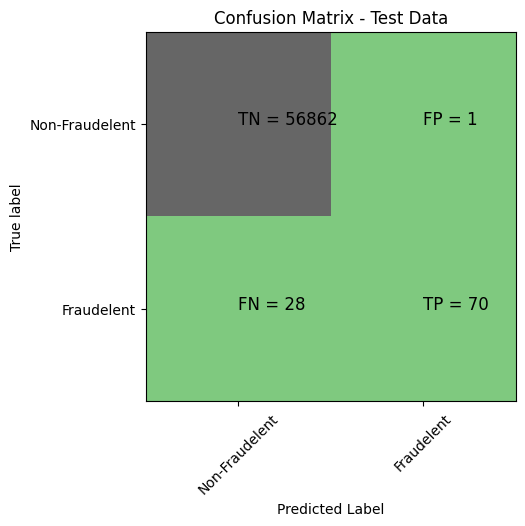

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC AUC Value: 0.9458555418016881
Random Forest Threshold: 0.01
ROC AUC for the test dataset: 94.6%


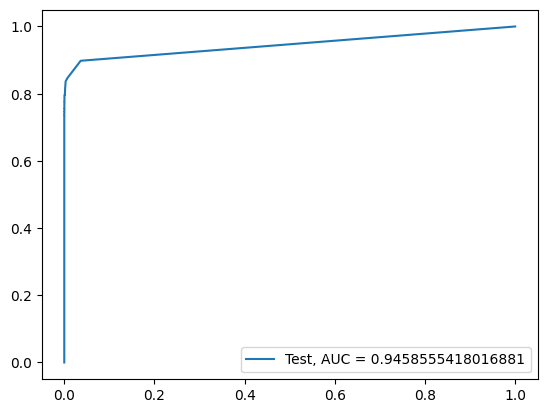

Time Taken by Model: -----153.1887652873993 seconds-----
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


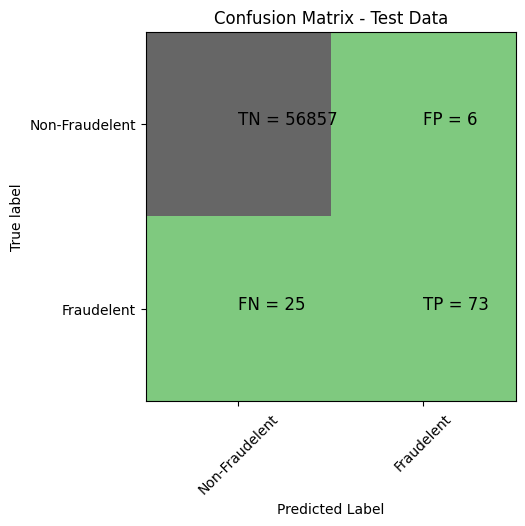

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.74      0.82        98

    accuracy                           1.00     56961
   macro avg       0.96      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost ROC AUC Value: 0.9783154068478948
XGBoost Threshold: 0.00014114730583969504
ROC for the test dataset: 97.8%


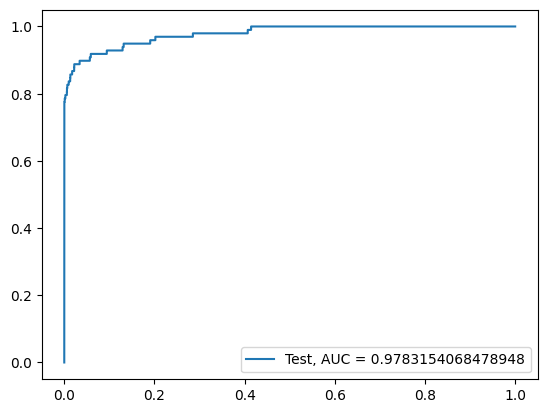

Time Taken by Model: -----1.449023723602295 seconds-----
------------------------------------------------------------


In [ ]:
df_Results

NameError: name 'df_Results' is not defined

# Oversampling with SMOTE Oversampling

*   We will use SMOTE Oversampling method to handle the class imbalance




In [ ]:
# Creating the dataset with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_smote, y_train_smote = SMOTE.fit_resample(X_train, y_train)

X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=cols)

In [ ]:
# Running Logistic Regression with L1 and L2 Regularisation
Data_Imbalance_Handling = "SMOTE with StratifiedKFold CV"
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling,  X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling,  X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling,  X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling,  X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling,  X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)



# Oversampling with ADASYN Oversampling

*   We will use ADASYN oversampling method to handle the class imbalance




In [ ]:
# Creating the dataset with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)

X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN, columns=cols)

In [ ]:
# Running Logistic Regression with L1 and L2 Regularisation
Data_Imbalance_Handling = "ADASYN with StratifiedKFold CV"
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling,  X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling,  X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---- %s seconds ----" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling,  X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling,  X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling,  X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: -----%s seconds-----" % (time.time() - start_time))
print('-'*60)



# Overall conclusion after running the models on the oversampled data

Looking at above results it seems XGBOOST model with Randomoversampling with stratifiedKFold CV has provided the best results under the result of all oversampling tecniques. So we will try to tune the hyperparameters of the model to get best results

Hyperparameter Tuning

In [ ]:
# Performing Hyperparameter tuning
from xgboost import XGBRFClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_test {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'n_estimators':range(60,130,150),
    'learning_rate':[0.05,0.1,0.125,0.15,0.2],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(7,10)],
    'colsample_bytree':[i/10.0 for i in range(7,10)]

}

gsearch1 = RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5,booster='gbtree',colsample_bylevel=1,
                                                      colsample_bynode=1,max_delta_step=0,
                                                      missing=None, n_jobs=-1,
                                                      nthread=None,objective='binary:logistic',random_state=42,
                                                      reg_alpha=0, reg_lambda=1,scale_pos_weight=1, seed=None,
                                                      silent=None, verbosity=1),
                                                      param_distributions= param_test, n_iter=5, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch1.fit(X_over,y_over)
gsearch1.cv_results_,gsearch1.cv_params_,gsearch1.best_score_

In [ ]:
# Creating XGBoost model with selected hyperparameters
from xgboost import XGBClassifier

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
                    learning_rate=0.125, max_delta_step=0, max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=60,n_jobs=1,
                    nthread=None,objective='binary:logistic',random_state=42,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent =None, subsample=0.8, verbosity=1)

# fit on the dataset
clf.fit(X_over,y_over)
XGB_test_score = clf.score(X_test,y_test)
print('Model Accuracy:{0}'.format(XGB_test_score))

# probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:,1]

#calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGboost roc_value:{0}".format(XGB_roc_value))
fpr,tpr,thresholds = metrics.roc_curve(y_test,XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

# Print the important features of the best model to understand the dataset

In [ ]:
imp_var = []
for i in clf.feature_importances_:
  imp_var.append(i)
  print('Top var =',imp_var.index(np.sort(clf.feature_importances_)[-1])+1)
  print('2nd Top var =',imp_var.index(np.sort(clf.feature_importances_)[-2])+1)
  print('3rd var =',imp_var.index(np.sort(clf.feature_importances_)[-3])+1)


In [ ]:
#calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGboost roc_value:{0}".format(XGB_roc_value))
fpr,tpr,thresholds = metrics.roc_curve(y_test,XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))